## Analysis of Epinions Dataset Part 2

The goal of the second analysis task is to train linear regression models to predict users' ratings towards items. This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned Epinions sub-dataset that is different from the one in Portfolio 1. 

### Import Cleaned Epinions Dataset
The csv file named 'Epinions_cleaned_data_portfolio_2.csv'is provided. Please import the csv file (i.e., 'Epinions_cleaned_data_portfolio_2') and print out its total length.

In [1]:
# your code and solution
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from matplotlib.ticker import FormatStrFormatter
import warnings
warnings.filterwarnings("ignore")

In [2]:
df =  pd.read_csv('Epinions_cleaned_data_portfolio_2.csv', index_col = 0)

In [3]:
print('Total Length: ', len(df))

Total Length:  2899


In [4]:
df.head()

,timestamp,review,item,rating,helpfulness,gender,category
userId,,,,,,,
4259,11900,"Finally, Something for (Relatively) Nothing",MyPoints.com,4.0,4.0,F,Online Stores & Services
4259,12000,Shocking!,Sixth Sense,5.0,4.0,F,Movies
4259,12000,Simply Shaggadelic!,Austin Powers: The Spy Who Shagged Me,5.0,4.0,F,Movies
4259,12000,Better Than The First!,Toy Story 2,5.0,3.0,F,Movies
4259,12000,Blair Witch made me appreciate this,Star Wars Episode I: The Phantom Menace,2.0,4.0,F,Movies


### Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column. 
* As our goal is to predict ratings given other columns, please get the correlations between helpfulness/gender/category/review and rating by using the `corr()` method.
* To get the correlations between different features, you may need to first convert the categorical features (i.e., gender, category and review) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding rating (positive or negative). Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for rating prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [5]:
# your code and solution
print('No of columns and rows: ', df.shape)
df.dtypes

No of columns and rows:  (2899, 7)


timestamp        int64
review          object
item            object
rating         float64
helpfulness    float64
gender          object
category        object
dtype: object

In [6]:
allTypes_df = df.select_dtypes(include = ['object', 'float64', 'int64']).copy()
allTypes_df.head()

,timestamp,review,item,rating,helpfulness,gender,category
userId,,,,,,,
4259,11900,"Finally, Something for (Relatively) Nothing",MyPoints.com,4.0,4.0,F,Online Stores & Services
4259,12000,Shocking!,Sixth Sense,5.0,4.0,F,Movies
4259,12000,Simply Shaggadelic!,Austin Powers: The Spy Who Shagged Me,5.0,4.0,F,Movies
4259,12000,Better Than The First!,Toy Story 2,5.0,3.0,F,Movies
4259,12000,Blair Witch made me appreciate this,Star Wars Episode I: The Phantom Menace,2.0,4.0,F,Movies


In [7]:
#Converting gender to numeric value
cleanup_nums = {"M" : 1,
                "F" :0}
allTypes_df = allTypes_df.replace(cleanup_nums)
allTypes_df.head()

,timestamp,review,item,rating,helpfulness,gender,category
userId,,,,,,,
4259,11900,"Finally, Something for (Relatively) Nothing",MyPoints.com,4.0,4.0,0,Online Stores & Services
4259,12000,Shocking!,Sixth Sense,5.0,4.0,0,Movies
4259,12000,Simply Shaggadelic!,Austin Powers: The Spy Who Shagged Me,5.0,4.0,0,Movies
4259,12000,Better Than The First!,Toy Story 2,5.0,3.0,0,Movies
4259,12000,Blair Witch made me appreciate this,Star Wars Episode I: The Phantom Menace,2.0,4.0,0,Movies


In [8]:
# Converting category to numeric value
allTypes_df["category"] = allTypes_df["category"].astype('category')
allTypes_df["category_numeric"] = allTypes_df["category"].cat.codes
allTypes_df.head() 

,timestamp,review,item,rating,helpfulness,gender,category,category_numeric
userId,,,,,,,,
4259,11900,"Finally, Something for (Relatively) Nothing",MyPoints.com,4.0,4.0,0,Online Stores & Services,6
4259,12000,Shocking!,Sixth Sense,5.0,4.0,0,Movies,5
4259,12000,Simply Shaggadelic!,Austin Powers: The Spy Who Shagged Me,5.0,4.0,0,Movies,5
4259,12000,Better Than The First!,Toy Story 2,5.0,3.0,0,Movies,5
4259,12000,Blair Witch made me appreciate this,Star Wars Episode I: The Phantom Menace,2.0,4.0,0,Movies,5


In [9]:
# Converting review to numeric value
allTypes_df["review"] = allTypes_df["review"].astype('category')
allTypes_df["review_numeric"] = allTypes_df["review"].cat.codes
allTypes_df.head() 

,timestamp,review,item,rating,helpfulness,gender,category,category_numeric,review_numeric
userId,,,,,,,,,
4259,11900,"Finally, Something for (Relatively) Nothing",MyPoints.com,4.0,4.0,0,Online Stores & Services,6,856
4259,12000,Shocking!,Sixth Sense,5.0,4.0,0,Movies,5,1985
4259,12000,Simply Shaggadelic!,Austin Powers: The Spy Who Shagged Me,5.0,4.0,0,Movies,5,2006
4259,12000,Better Than The First!,Toy Story 2,5.0,3.0,0,Movies,5,472
4259,12000,Blair Witch made me appreciate this,Star Wars Episode I: The Phantom Menace,2.0,4.0,0,Movies,5,493


In [10]:
# Correlation between helpfulness and rating
print('Correlation between helpfulness and rating: ', allTypes_df['helpfulness'].corr(df['rating']))

# Correlation between gender and rating
print('\nCorrelation between gender and rating: ', allTypes_df['gender'].corr(df['rating']))

# Correlation between category and rating
print('\nCorrelation between category and rating: ', allTypes_df['category_numeric'].corr(df['rating']))

# Correlation between review and rating
print('\nCorrelation between review and rating: ', allTypes_df['review_numeric'].corr(df['rating']))

Correlation between helpfulness and rating:  -0.016832209821488527

Correlation between gender and rating:  0.018105039011507576

Correlation between category and rating:  -0.1405763818013759

Correlation between review and rating:  -0.06207107945825094


# Analysis
- Correaltion above consist of both positive and negative values where -1/1 indicate strong relationship between the correlated subjects. Highest correlation in this dataset is between gender and rating with a value of 0.018, which indicates a very weak relationship between the gender and rating, which is logically interprted as true cause regardless of gender, it is a human entity rating a item. And human generally like stuff which is the societal norm to do their environment.

- Least correlated items in this dataset are review and rating with a value of -0.062 similiar to above analysis this correalation has a weak realtionship which can't really be interperted as rating is a number and review is more of expression to towards a particular items hence the weak correlation between them, if we could build an algorithm to detect the tone of the review and rate it on a scale of 5 then calculate the correalation between review and rating it would be more meaningful.



### Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set. 
* To further investigate whether the size of the training/testing data affects the model performance, please random split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data. 
* Print the shape of training and testing sets in the two cases. 

In [11]:
# Case 1
train_1, test_1 = train_test_split(allTypes_df, test_size=0.1, random_state=142)
print(train_1.shape)
print(test_1.shape)

(2609, 9)
(290, 9)


In [12]:
# Case 2
train_2, test_2 = train_test_split(allTypes_df, test_size=0.9, random_state=142)
print(train_2.shape)
print(test_2.shape)

(289, 9)
(2610, 9)


### Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results. 
* To investigate whether feature selection affects the model performance, please select __two most correlated features and two least correlated features__ regarding rating, respectively. 
* Train __four__ linear regression models by following the conditions:
    - (model-a) using the training/testing data in __case 1__ with __two most__ correlated input features
    - (model-b) using the training/testing data in __case 1__ with __two least__ correlated input features
    - (model-c) using the training/testing data in __case 2__ with __two most__ correlated input features
    - (model-d) using the training/testing data in __case 2__ with __two least__ correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [13]:
allTypes_df.corr()

,timestamp,rating,helpfulness,gender,category_numeric,review_numeric
timestamp,1.000000,0.019860,0.003638,-0.049244,0.037118,-0.025036
rating,0.019860,1.000000,-0.016832,0.018105,-0.140576,-0.062071
helpfulness,0.003638,-0.016832,1.000000,-0.046627,-0.000189,0.016170
gender,-0.049244,0.018105,-0.046627,1.000000,-0.017644,-0.014422
category_numeric,0.037118,-0.140576,-0.000189,-0.017644,1.000000,0.012047
review_numeric,-0.025036,-0.062071,0.016170,-0.014422,0.012047,1.000000


### Two *most* correlated features regarding rating
- Category with **-0.140576** correlation
- Gender with **0.018105** correlation

### Two *least* correlated features regarding rating
- Helpfulness with **-0.016832** correlation
- Review with **-0.062071** correlation

In [14]:
#Model A Case 1 Two most correlated inputs: Gender and Rating
#print('Model A Case 1 - Gender & Rating')

X_train_A = train_1[['gender']]
y_train_A = train_1['rating']
X_test_A = test_1[['gender']]
y_test_A = test_1['rating']

reg = linear_model.LinearRegression()
reg.fit(X_train_A, y_train_A)




LinearRegression()

In [15]:
#Model B Case 1 - Least Correlated inputs: Review and Rating

X_train_B = train_1[['review_numeric']]  
y_train_B = train_1['rating']

X_test_B = test_1[['review_numeric']]
y_test_B = test_1['rating']

reg = linear_model.LinearRegression()
reg.fit(X_train_B, y_train_B)


LinearRegression()

In [16]:
#Model C Case 2 - Most correlated inputs: Gender and Rating

X_train_C = train_2[['gender']]
y_train_C = train_2['rating']

X_test_C = test_2[['gender']]
y_test_C = test_2['rating']

reg = linear_model.LinearRegression()
reg.fit(X_train_C, y_train_C)

LinearRegression()

In [17]:
#Model D Case 2 - Least Correlated Inputs: Review and Rating

X_train_D = train_2[['review_numeric']]
y_train_D = train_2['rating']

X_test_D = test_2[['review_numeric']]
y_test_D = test_2['rating']

reg = linear_model.LinearRegression()
reg.fit(X_train_D, y_train_D)

LinearRegression()

### Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [18]:
#Model A Case 1 Two most correlated inputs: Gender and Rating
predicted = reg.predict(X_test_A)
mseA = ((np.array(y_test_A)-predicted)**2).sum()/len(y_test_A)
RootMseA =  np.sqrt(mseA)
print('\nMODEL A Case 1 - Most Correlated Input: Gender and Rating')
print("MSE:", mseA)
print("Root MSE A:",(RootMseA))


#Model B Case 1 - Least Correlated inputs: Review and Rating
predicted = reg.predict(X_test_B)
mseB = ((np.array(y_test_B)-predicted)**2).sum()/len(y_test_B)
RootMseB =  np.sqrt(mseB)
print('\nMODEL B Case 1 - Least Correlated Input: Review and Rating')
print("MSE B:", mseB)
print("Root MSE B:", RootMseB)


#Model C Case 2 - Most correlated inputs: Gender and Rating
predicted = reg.predict(X_test_C)
mseC = ((np.array(y_test_C)-predicted)**2).sum()/len(y_test_C)
RootMseC =  np.sqrt(mseC)
print('\nMODEL C Case 2 - Most Correlated Input: Gender and Rating')
print("MSE C:", mseC)
print("Root MSE C:", RootMseC)


#Model D Case 2 - Least Correlated Inputs: Review and Rating
predicted = reg.predict(X_test_D)
mseD = ((np.array(y_test_D)-predicted)**2).sum()/len(y_test_D)
RootMseD =  np.sqrt(mseD)
print('\nMODEL D Case 2 - Least Correlated Input: Review and Rating')
print("MSE D:", mseD)
print("Root MSE D:", RootMseD)


MODEL A Case 1 - Most Correlated Input: Gender and Rating
MSE: 1.8101301767292797
Root MSE A: 1.345410783637949

MODEL B Case 1 - Least Correlated Input: Review and Rating
MSE B: 1.7257329415921567
Root MSE B: 1.3136715501190381

MODEL C Case 2 - Most Correlated Input: Gender and Rating
MSE C: 1.8560398100514894
Root MSE C: 1.362365519987749

MODEL D Case 2 - Least Correlated Input: Review and Rating
MSE D: 1.7969071859939831
Root MSE D: 1.3404876672293495


### Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

In [19]:
# your code and solution
modelView = {'MODEL':['A','B','C', 'D'], 'MSE' : [mseA,mseB,mseC,mseD], 'ROOTMSE' : [RootMseA, RootMseB,RootMseC,RootMseD]}
modelView_df = pd.DataFrame(data=modelView)
modelView_df

,MODEL,MSE,ROOTMSE
0,A,1.810130,1.345411
1,B,1.725733,1.313672
2,C,1.856040,1.362366
3,D,1.796907,1.340488


In [20]:
MODELS = 'A','B','C', 'D'
MSE = mseA,mseB,mseC,mseD
ROOTMSE = RootMseA, RootMseB,RootMseC,RootMseD

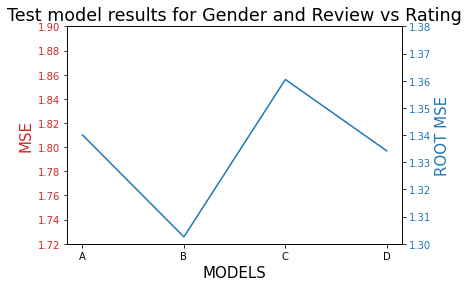

In [21]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_title('Test model results for Gender and Review vs Rating',fontsize = 17.5)
ax1.set_xlabel('MODELS',fontsize=15)
ax1.set_ylabel('MSE', color=color,fontsize=15)
ax1.plot(MODELS,MSE)
ax1.set_ylim([1.72, 1.90])
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('ROOT MSE', color=color,fontsize=15) 
ax2.set_ylim([1.30, 1.38])
ax2.tick_params(axis='y', labelcolor=color)
plt.show()

## Insightful Analysis
Above plot represents values of both MSE and Root MSE, which is a comparison test and train models. In Case 1 most and least correlated value are that far off each other, with a gap of 0.1 between we can establish that Model A and B are quite identitical. Same analysis is evident between Model C and D therefore we can conclude our surveveyed data is fairly accurate and applicable to greather range of inputs.